___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors


## Import Libraries



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load the Data


In [2]:
df = pd.read_csv("knn_data.csv",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


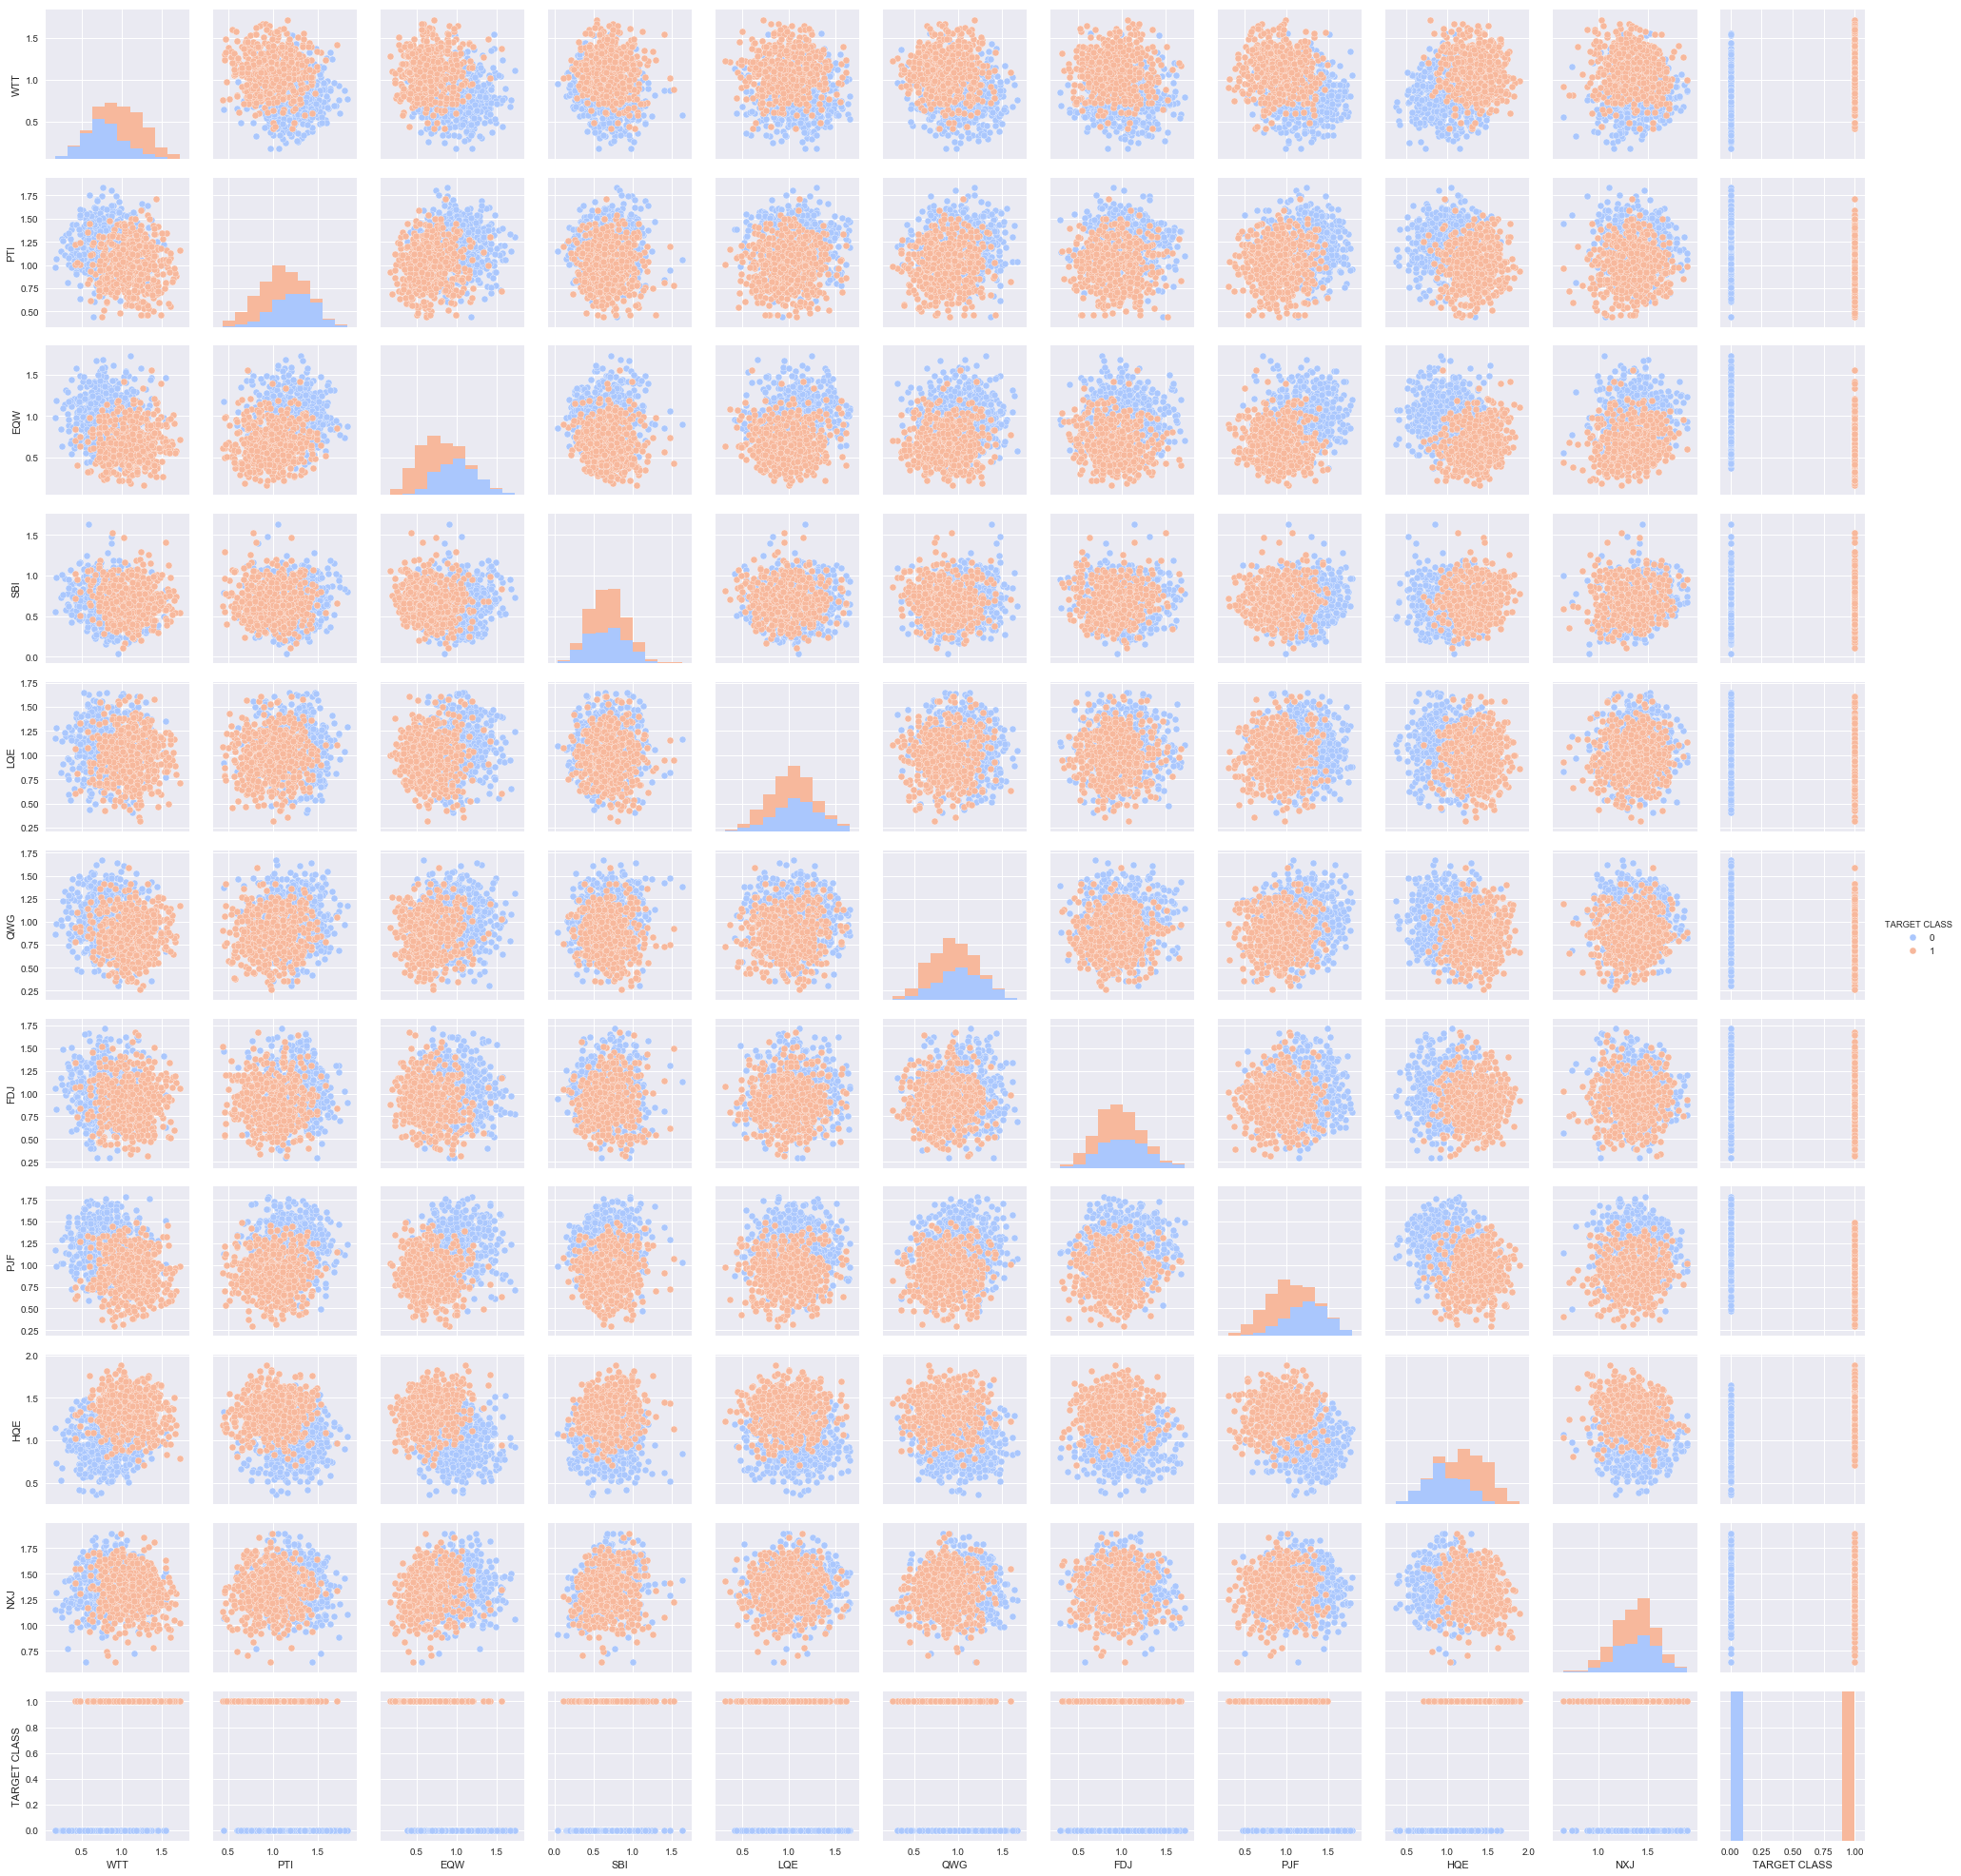

In [4]:
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
X = df.drop('TARGET CLASS',axis=1)
y = df['TARGET CLASS']


In [8]:
scaler.fit(X)
scaled_features = scaler.transform(X)

In [9]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,y,test_size=0.30, random_state = 50)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
print(confusion_matrix(y_test,pred))

[[139  13]
 [  5 143]]


In [19]:
accuracy_score(y_test, pred)

0.93999999999999995

In [20]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.97      0.91      0.94       152
          1       0.92      0.97      0.94       148

avg / total       0.94      0.94      0.94       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [21]:
error_rate = []

# Will take some time
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [22]:
error_rate

[0.093333333333333338,
 0.08666666666666667,
 0.070000000000000007,
 0.056666666666666664,
 0.059999999999999998,
 0.050000000000000003,
 0.053333333333333337,
 0.050000000000000003,
 0.063333333333333339,
 0.056666666666666664,
 0.056666666666666664,
 0.050000000000000003,
 0.053333333333333337,
 0.053333333333333337,
 0.063333333333333339,
 0.063333333333333339,
 0.063333333333333339,
 0.056666666666666664,
 0.063333333333333339,
 0.059999999999999998,
 0.053333333333333337,
 0.050000000000000003,
 0.046666666666666669,
 0.050000000000000003,
 0.053333333333333337,
 0.053333333333333337,
 0.050000000000000003,
 0.053333333333333337,
 0.056666666666666664,
 0.053333333333333337,
 0.053333333333333337,
 0.050000000000000003,
 0.046666666666666669,
 0.050000000000000003,
 0.053333333333333337,
 0.053333333333333337,
 0.053333333333333337,
 0.053333333333333337,
 0.053333333333333337,
 0.053333333333333337,
 0.053333333333333337,
 0.053333333333333337,
 0.056666666666666664,
 0.056666666

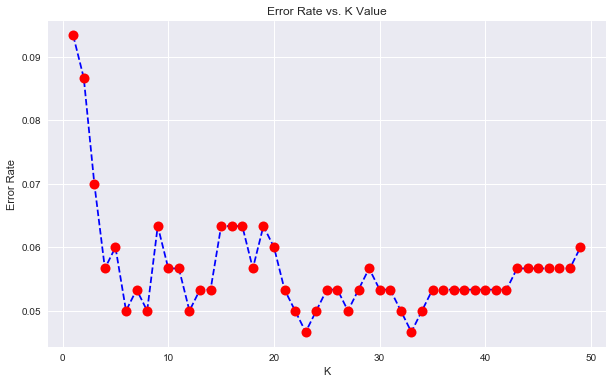

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
error_rate.index(min(error_rate))

22

## Parameter Tuning with Cross Validation



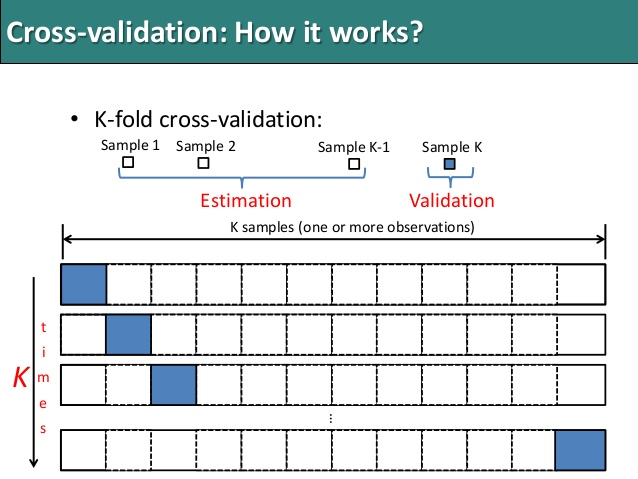

In [25]:
from IPython.display import Image
Image(filename='knn_cv.jpg')

As seen in the image, k-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k−1k−1 folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out.

In [26]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [27]:
y[:5]

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [28]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross validation

knn = KNeighborsClassifier(n_neighbors=22)
scores = cross_val_score(knn, df_feat, y, cv=10, scoring='accuracy')
print(scores.mean())

0.936


In [29]:
scores

array([ 0.93,  0.95,  0.91,  0.9 ,  0.91,  0.94,  0.94,  0.94,  0.96,  0.98])

In [30]:
from sklearn.model_selection import cross_val_score

# perform 10-fold cross validation

knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn, df_feat, y, cv=10, scoring='accuracy')
print(scores.mean())

0.935


In [31]:
scores

array([ 0.94,  0.93,  0.93,  0.92,  0.89,  0.94,  0.92,  0.93,  0.97,  0.98])

## Select the best K value in KNN

In [32]:
from sklearn.model_selection import cross_val_score

neighbors  = list(range(1,50))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df_feat, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [33]:
cv_scores[:5]

[0.91099999999999992,
 0.90900000000000003,
 0.92800000000000016,
 0.93399999999999994,
 0.92899999999999994]

The optimal number of neighbors is 46


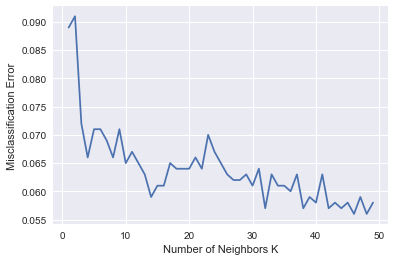

In [34]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [35]:
cv_scores[46]

0.94100000000000006

##  Compare models

In [36]:
X = df_feat
y = y

In [37]:
knn = KNeighborsClassifier(n_neighbors=46)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.944


In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.947


### https://www.youtube.com/watch?v=6dbrR-WymjI&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=7
